# El pequeño café regentado por robots en Los Ángeles

__Descripción del Proyecto:__

- Cómo manejar un pequeño café __regentado por robots__ en Los Ángeles
- El proyecto es prometedor pero caro, por lo que se buscamos __atraer inversores__

__Preguntas clave:__
- Interés en conocer las __condiciones actuales del mercado__
- ¿Se mantendrá el __éxito__ cuando la novedad de los camareros robots desaparezca?

__Paso 1: Descarga y Preparación de Datos__

- Descargar los __datos de los restaurantes__ en LA desde el archivo `/datasets/rest_data_us.csv`
- Verificar y corregir el __tipo de datos__ para cada columna
- Asegurarse de que no hay __valores ausentes__ o __duplicados__

__Paso 2: Análisis de Datos__

- Investigar las proporciones de los __diferentes tipos de establecimientos__ y graficar los resultados
- Investigar las proporciones de __establecimientos que pertenecen a una cadena__ y los que no, y graficarlos
- __Identificar__ qué tipo de establecimiento es comúnmente una cadena
- Las cadenas suelen tener __muchos establecimientos con pocos asientos__ o __pocos establecimientos con muchos asientos__?
- Calcular el __promedio de número de asientos__ para cada tipo de restaurante y graficarlos
- Separar los datos de las direcciones de la columna `address` en una columna aparte
- Graficar las __diez mejores calles__ por número de restaurantes
- Encontrar el número de calles que tienen __solo un restaurante__
- Analizar la __distribución del número de asientos__ en calles con muchos restaurantes

__Paso 3: Preparar una Presentación__

- Crear una __presentación de la investigación__ para compartir con el grupo de inversores
- Convertir la presentación a __formato PDF__ para su evaluación
- Incluir un __enlace a la presentación__ en una celda markdown

__Descripción de Datos:__

- `id`: id del establecimiento
- `name`: nombre del establecimiento
- `chain`: indicador de si el establecimiento pertenece a una cadena (TRUE/FALSE)
- `type`: tipo de establecimiento
- `address`: dirección
- `seats`: número de asientos

## Importar las librerías y los archivos

In [56]:
# importar las libresias

import re
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

In [57]:
warnings.filterwarnings('ignore')

In [2]:
# importar el archivo y generar una copia por el análisis

data_original = pd.read_csv('./rest_data_us.csv')

data = data_original.copy()

## Análisis Exploratorio de Datos

In [3]:
# renombrar las columnas

data = data.rename(columns={
    'object_name': 'name',
    'object_type': 'type',
    'number': 'seats'
})

data.columns

Index(['id', 'name', 'address', 'chain', 'type', 'seats'], dtype='object')

In [4]:
# mostrar la información general del DataFrame

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       9651 non-null   int64 
 1   name     9651 non-null   object
 2   address  9651 non-null   object
 3   chain    9648 non-null   object
 4   type     9651 non-null   object
 5   seats    9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


In [5]:
# imprimir una muestra del conjunto

data.head()

,id,name,address,chain,type,seats
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


### Resumen estádistico y distribución de los datos 

In [6]:
# mostrar el resumen estádistico de la columna 'seats'

data['seats'].describe()

count    9651.000000
mean       43.695161
std        47.622874
min         1.000000
25%        14.000000
50%        27.000000
75%        46.000000
max       229.000000
Name: seats, dtype: float64

In [7]:
# mostrar la distribución de los valores de la columna 'chain'

data['chain'].value_counts()

False    5972
True     3676
Name: chain, dtype: int64

In [8]:
# mostrar la distribución de los valores de la columna 'type'

data['type'].value_counts()

Restaurant    7255
Fast Food     1066
Cafe           435
Pizza          320
Bar            292
Bakery         283
Name: type, dtype: int64

### Valores Ausentes

In [9]:
# mostrar los valores ausentes en el DataFrame

data[data['chain'].isna()]

,id,name,address,chain,type,seats
7408,19194,TAQUERIA LOS 3 CARNALES,5000 E WHITTIER BLVD,NaN,Restaurant,14
7523,19309,JAMMIN JIMMY'S PIZZA,1641 FIRESTONE BLVD,NaN,Pizza,1
8648,20434,THE LEXINGTON THEATER,129 E 3RD ST,NaN,Restaurant,35


In [10]:
# eliminar las filas con valores ausentes en la columna 'chain'

data = data.dropna()

data[data['chain'].isna()]

,id,name,address,chain,type,seats


In [11]:
# mostrar el DataFrame actualizado

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       9648 non-null   int64 
 1   name     9648 non-null   object
 2   address  9648 non-null   object
 3   chain    9648 non-null   object
 4   type     9648 non-null   object
 5   seats    9648 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 527.6+ KB


### Evaluación

- __Renombramos__ las columnas del DataFrame
- Encontramos __9651 entradas__ y un total de __6 columnas__
- El __promedio de asientos__ de los diferentes establecimientos es al rededor de __43__
- Se encuentran __3676__ establecimientos en la categoria ‘chain’
- __5972__ establecimientos no son parte de una cadena
- Eliminamos 3 entradas con __valores ausentes__ en la columna `chain`

### Limpiar los datos

In [12]:
# empezar a limpiar los datos

for name in data['name'].value_counts().head(10).index:
    data['name'] = data['name'].str.replace(fr'.*{name}.*', f'{name}', regex=True)

In [13]:
# remplazar casos especificos

data['name'] = data['name'].str.replace('COFFEE BEAN AND TEA LEAF', 'THE COFFEE BEAN & TEA LEAF')
data['name'] = data['name'].str.replace('KFC', 'KENTUCKY FRIED CHICKEN')
data['name'] = data['name'].str.replace('KENTUCK FRIED CHICKEN', 'KENTUCKY FRIED CHICKEN')
data['name'] = data['name'].str.replace('LA FUENTE #6', 'LA FUENTE')
data['name'] = data['name'].str.replace('CASESAR', 'LITTLE CAESAR')
data['name'] = data['name'].str.replace('CEASAR', 'LITTLE CAESAR')
data['name'] = data['name'].str.replace("TOM'S #5", "TOM'S JR BURGERS")
data['name'] = data['name'].str.replace("LEMONADES", "LEMONADE")
data['name'] = data['name'].str.replace("LEMONADE ON SAWTELLE", "LEMONADE")
data['name'] = data['name'].str.replace("#1 DONUT", "#1 DONUT")
data['name'] = data['name'].str.replace("85 C BAKERY CAFE", "85 CELSIUS BAKERY CAFE")
data['name'] = data['name'].str.replace("A WON JAPANASE RESTAURANT", "A WON JAPANESE RESTAURANT")
data['name'] = data['name'].str.replace("WING STOP", "WINGSTOP")
data['name'] = data['name'].str.replace("WETZEL", "WETZEL'S PRETZEL'S")
data['name'] = data['name'].str.replace("WHOLE FOODS365", "WHOLE FOODS MARKET")
data['name'] = data['name'].str.replace("YOGURT LAND", "YOGURTLAND")

data['name'] = data['name'].str.replace(r'.*EINSTEIN.*', 'EINSTEIN BROS. BAGELS', regex=True)
data['name'] = data['name'].str.replace(r'.*EINSTEIN.*', 'EINSTEIN BROS. BAGELS', regex=True)
data['name'] = data['name'].str.replace(r'.*OCHA CLASSIC RESTAURANT.*', 'OCHA CLASSIC RESTAURANT', regex=True)
data['name'] = data['name'].str.replace(r'.*OCHA RESTAURANT.*', 'OCHA CLASSIC RESTAURANT', regex=True)
data['name'] = data['name'].str.replace(r'.*OCHA THAI.*', 'OCHA CLASSIC RESTAURANT', regex=True)
data['name'] = data['name'].str.replace(r'.*OCHA CLASSIC.*', 'OCHA CLASSIC RESTAURANT', regex=True)
data['name'] = data['name'].str.replace(r".*TOM'S JR.*", "TOM'S JR BURGERS", regex=True)
data['name'] = data['name'].str.replace(r".*TOM'S JUNIOR.*", "TOM'S JR BURGERS", regex=True)
data['name'] = data['name'].str.replace(r".*TOM'S BURGER.*", "TOM'S JR BURGERS", regex=True)

In [14]:
# asegurarse de que las cadenas con más de un establecimientos tengan el mismo nombre

names_list = [
    'PANDA EXPRESS', 'CHIPOTLE', 'AFC SUSHI', 'RALPHS MARKET', 'MRS FIELD\'S COOKI',
    'JACK IN THE BOX', 'PIZZA HUT', 'JAMBA JUICE', 'DER WIENERSCHNITZEL', 'CARLS JR',
    'TACO BELL', 'CHINATOWN EXPRESS', 'YOSHINOYA', 'FOOD 4 LESS', 'IHOP',
    'CEMITAS POBLANAS MI MAGDALENA RESTAURANT', 'REINAS PUPUSERIA', 'LOUISIANA FRIED CHICKEN',
    'CASITA TACO AL CARBON', 'EL POLLO LOCO', 'BURGER KING', 'KENTUCKY FRIED CHICKEN',
    'LAS CHAMPAS RESTAURANT', 'WHICH WICH', 'DENNY\'S', 'YUM YUM DONUT', 'OLYMPIC DONUTS',
    'TUPANYOU PIZZA', 'VONS MARKET', 'DEL TACO', 'BIONICOS LA PALAPA', 'EL TEXANITO',
    'NORTHGATE MARKETS', 'LA ESQUINA RESTAURANT', 'BOSTON MARKET', 'COSTCO WHOLESALE',
    'LITTLE CAESAR', 'WINGSTOP', 'ACE SUSHI', 'SMART & FINAL', 'VALENCIA REST. GROUP',
    'FIVE GUYS BURGERS & FRIES', 'KING TACO', 'IN-N-OUT BURGER', 'LA PIZZA LOCA',
    'POPEYES CHICKEN', 'HOMETOWN BUFFET REST', 'TARGET STORES', 'SBARRO', 'BIONICOS JALISCOS',
    'SHAKEYS PIZZA PARLOR', 'SEOUL SOON DAE HOUSE', 'TACO HOUSE', 'SOUPLANTATION', 'ALLEY DOG',
    'TROY\'S BURGERS', 'WINCHELL\'S DONUT', 'CHURCH\'S FRIED CHICKEN', 'SIZZLER', 'ENGINE',
    'EL BORREGO DE ORO', 'VALLARTA SUPERMARKET', 'CALIFORNIA PIZZA KITCHEN', 'CARVEL',
    'LAMBERTOS MEXICAN FOOD', 'FATBURGER', 'PLAZA DE MARISCOS', 'JOHNNY ROCKETS', 'WENDY\'S',
    'TGI FRIDAY\'S', 'NOAH\'S NEW YORK BAGELS', 'CARL\'S JR', 'SHAKEY\'S PIZZA PARLOR',
    'DOMINO\'S PIZZA', 'YOGURTLAND', 'JERSEY MIKE\'S SUBS', 'BASKIN ROBBINS', 'PINKBERRY',
    'POLLO CAMPERO', 'BAJA FRESH', 'EDIBLE ARRANGEMENTS', 'LE PAIN QUOTIDIEN', 'MENDOCINO FARMS',
    'THE FLAME BROILER', 'PARIS BAGUETTE', 'JIM\'S BURGERS', 'POKE BAR', 'THE COUNTER', 'EARTHBAR',
    'PRESSED JUICERY', 'DUNKIN\' DONUTS', 'TOGO\'S', 'TUTTI FRUTTI', 'ANGELO\'S BAKERY', 'AMALIA\'S RESTAURANT',
    'ANDANTE COFFEE ROASTERS', 'WETZEL\'S PRETZEL\'S', 'YEKTA RESTAURANT', 'YEN SUSHI'
]

for name in names_list:
    data['name'] = data['name'].str.replace(fr'.*{name}.*', f'{name}', regex=True)

### Evaluación

- Muchos establecimientos tenían __nombres diferentes__ por cada sucursal
- Esto puede generar un problema cuando quieremos calcular el __número de establecimientos__ por cadena
- Después de la __limpieza__ a travez de los bucles solucionamos este problema

## Análisis de datos

### Diferentes tipos de establecimientos

In [15]:
# calcular el porcentaje de los diferentes tipos de establecimientos

p_type = data['type'].value_counts(normalize=True)

for tipo, porcentaje in p_type.items():
    print(f"•{tipo} representa el {porcentaje*100:.2f}% de los establecimientos")

•Restaurant representa el 75.18% de los establecimientos
•Fast Food representa el 11.05% de los establecimientos
•Cafe representa el 4.51% de los establecimientos
•Pizza representa el 3.31% de los establecimientos
•Bar representa el 3.03% de los establecimientos
•Bakery representa el 2.93% de los establecimientos


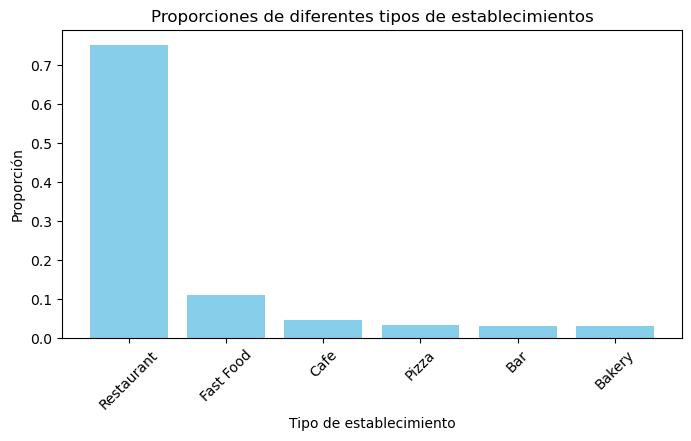

In [16]:
# crear un gráfico de barras para visualizar las proporciones

plt.figure(figsize=(8, 4))
plt.bar(p_type.index, p_type.values, color='skyblue')
plt.xlabel('Tipo de establecimiento')
plt.ylabel('Proporción')
plt.title('Proporciones de diferentes tipos de establecimientos')
plt.xticks(rotation=45)

plt.show()

### Establecimientos únicos y cadenas

In [17]:
# calcular las proporciones de establecimientos que pertenecen a una cadena y los que no

p_chain = data['chain'].value_counts(normalize=True)

print(f"•Porcentaje de establecimientos que no pertenecen a una cadena: {p_chain[False]*100:.2f}%")
print(f"•Porcentaje de establecimientos que pertenecen a una cadena: {p_chain[True]*100:.2f}%")

•Porcentaje de establecimientos que no pertenecen a una cadena: 61.90%
•Porcentaje de establecimientos que pertenecen a una cadena: 38.10%


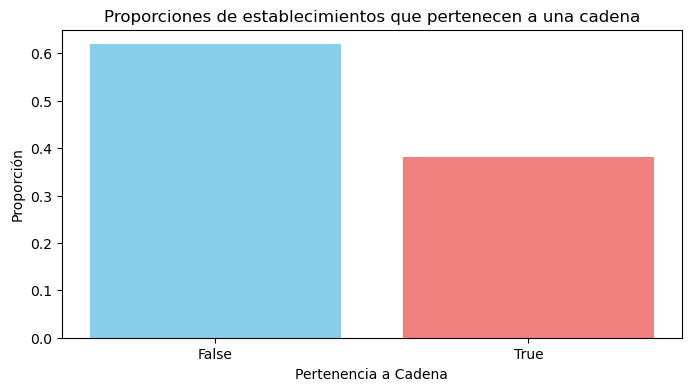

In [36]:
# trazar un gráfico de barras para visualizar las proporciones

plt.figure(figsize=(8, 4))

plt.bar(range(len(p_chain)), p_chain.values, color=['skyblue', 'lightcoral'])
plt.xlabel('Pertenencia a Cadena')
plt.ylabel('Proporción')
plt.title('Proporciones de establecimientos que pertenecen a una cadena')
plt.xticks(range(len(p_chain)), p_chain.index)

plt.show()

### Distribución de las categorías

In [37]:
# encontrar el tipo de establecimiento con el mayor porcentaje de cadenas

group_type = data.groupby(['type', 'chain']).size().unstack(fill_value=0)
group_type['Porcentaje de Cadenas'] = (group_type[True] / (group_type[True] + group_type[False])) * 100
chain_type = group_type['Porcentaje de Cadenas'].idxmax()

for tipo in group_type.index:
    porcentaje_cadenas = group_type.loc[tipo, 'Porcentaje de Cadenas']
    print(f"•Porcentaje de cadenas por {tipo}: {porcentaje_cadenas:.2f}%")
    
print(f"•El tipo de establecimiento comúnmente una cadena es: {chain_type}")

•Porcentaje de cadenas por Bakery: 100.00%
•Porcentaje de cadenas por Bar: 26.37%
•Porcentaje de cadenas por Cafe: 61.15%
•Porcentaje de cadenas por Fast Food: 56.75%
•Porcentaje de cadenas por Pizza: 47.96%
•Porcentaje de cadenas por Restaurant: 31.60%
•El tipo de establecimiento comúnmente una cadena es: Bakery


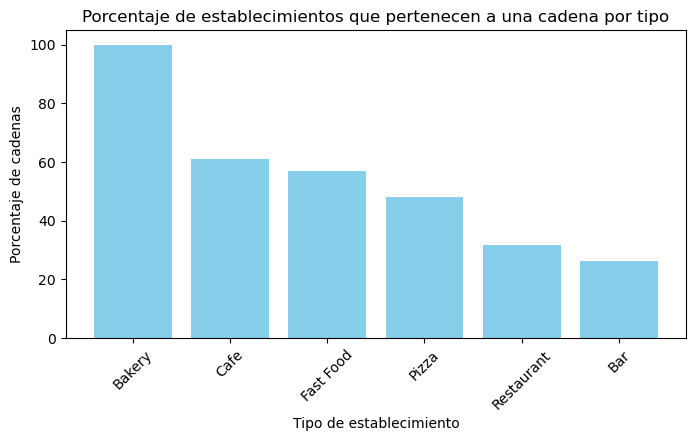

In [38]:
# trazar un gráfico de barras para visualizar los porcentajes

group_type_sorted = group_type.sort_values(by='Porcentaje de Cadenas', ascending=False)

plt.figure(figsize=(8, 4))
plt.bar(group_type_sorted.index, group_type_sorted['Porcentaje de Cadenas'], color='skyblue')
plt.xlabel('Tipo de establecimiento')
plt.ylabel('Porcentaje de cadenas')
plt.title('Porcentaje de establecimientos que pertenecen a una cadena por tipo')
plt.xticks(rotation=45)

plt.show()

### Evaluación

- Los __restaurantes__ son el tipo de establecimiento __más común__
- Las __bakeries__ son el tipo de establecimiento comúnmente __parte de una cadena__
- Se encuentran más __establecimientos únicos__, el 61%
- Los establecimientos comúnemente __únicos__ son los restaurantes

### Distribución de asientos por cadenas

In [39]:
# mostrar la distribución de establecimientos por cadena

chain_distribution = data[data['chain'] == True]['name'].value_counts()


print('Cadenas con el mayor número de establecimientos:')
print()
print(chain_distribution.head(10))
print('-'*34)
print('Resumen estádistico:')
print()
print(chain_distribution.describe())

Cadenas con el mayor número de establecimientos:

SUBWAY                        152
STARBUCKS                     129
MCDONALD'S                     82
THE COFFEE BEAN & TEA LEAF     60
JACK IN THE BOX                53
EL POLLO LOCO                  38
BURGER KING                    38
TACO BELL                      33
PIZZA HUT                      31
DOMINO'S PIZZA                 30
Name: name, dtype: int64
----------------------------------
Resumen estádistico:

count    1978.000000
mean        1.858443
std         5.735546
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max       152.000000
Name: name, dtype: float64


In [40]:
# mostrar el promedio de asientos por tienda (cadenas)

chain_data = data[data['chain'] == True]

chain_data_grouped = chain_data.groupby('name').agg({'name':'count', 'seats':'mean'})
chain_data_grouped = chain_data_grouped.rename(columns={'name': 'number'}).reset_index()

chain_data_grouped.head()

,name,number,seats
0,#1 CHINESE FAST FOOD,1,6.0
1,1810 RESTAURANT,1,45.0
2,333,1,180.0
3,3RD ST MARKET & DELI,1,7.0
4,4 CAMINOS RESTAURANT,1,18.0


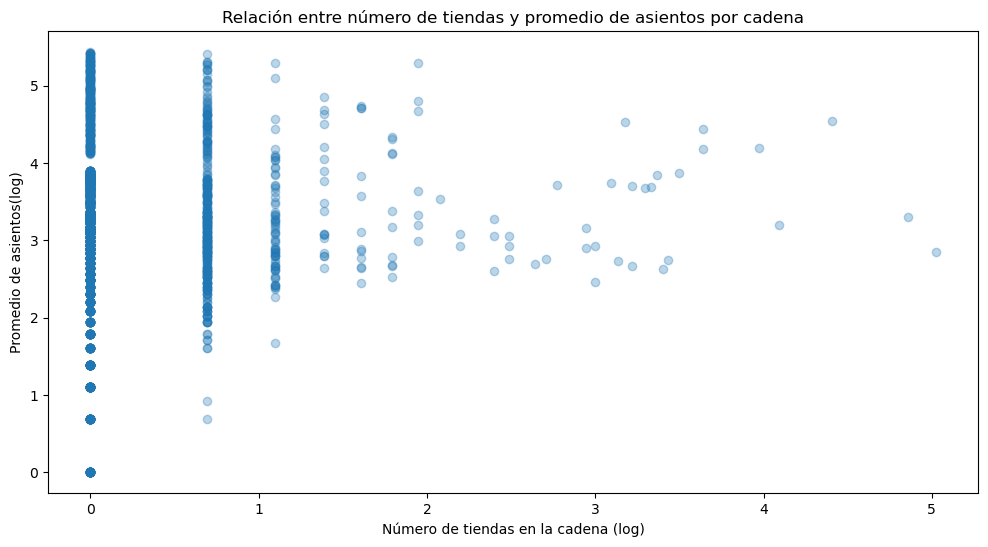

In [41]:
# trazar un diagrama de dispersión entre numero de establecimientos y promedio de asientos

plt.figure(figsize=(12, 6))
plt.scatter(np.log(chain_data_grouped['number']),np.log(chain_data_grouped['seats']), alpha=0.3)

plt.xlabel('Número de tiendas en la cadena (log)')
plt.ylabel('Promedio de asientos(log)')
plt.title('Relación entre número de tiendas y promedio de asientos por cadena')

plt.show()

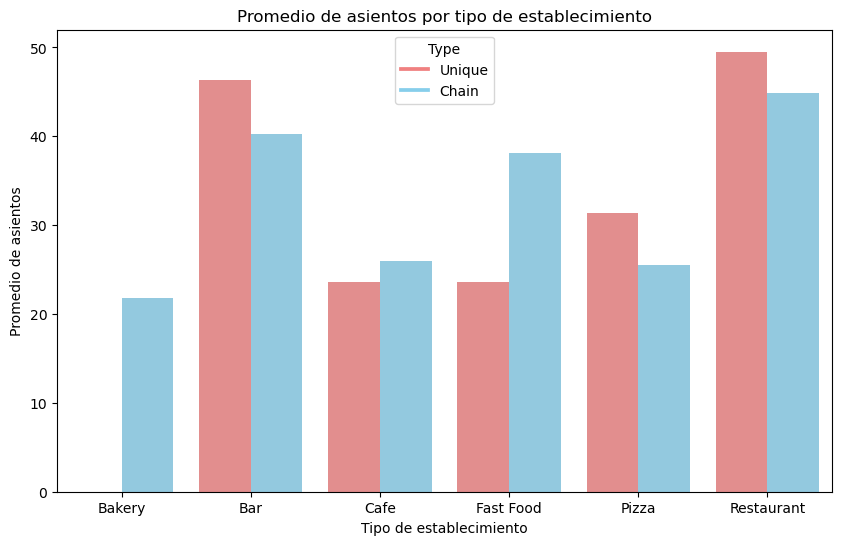

In [59]:
# mostrar la distribución de asientos por cada categoria

avg_seats = data.groupby(['type', 'chain'])['seats'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='type', y='seats', hue='chain', data=avg_seats, palette=['lightcoral', 'skyblue'])

plt.xlabel('Tipo de establecimiento')
plt.ylabel('Promedio de asientos')
plt.title('Promedio de asientos por tipo de establecimiento')

plt.legend(title='Type', labels=['Unique', 'Chain'])

# Usar legend_handles_v1 en lugar de legend_handles para evitar la advertencia de deprecación
legend = plt.gca().get_legend()
legend.legendHandles[0].set_color('lightcoral')
legend.legendHandles[1].set_color('skyblue')

plt.show()

### Evaluación

- Las cadenas suelen tener __pocos establecimientos con mucho asientos__
- Los __establecimientos únicos__ suelen tener más asientos
- Los establecimientos con __más asientos__ son los restaurantes y los bares

## Ubicaciones Recomendadas

In [43]:
# agregar nueva columna en `data` con las direcciones de los establecimientos

data['location'] = data['address'].str.split(',').str[0]

In [44]:
# eliminar números y numerales

def remove_numbers_and_symbols(text):
    cleaned_text = re.sub(r'\d+', '', text) 
    cleaned_text = cleaned_text.replace('#', '')
    cleaned_text = cleaned_text.replace('-', '')
    cleaned_text = cleaned_text.replace('/', '')

    return cleaned_text

In [45]:
# asegurarse de que las cadenas con más de un establecimientos tengan el mismo nombre

location_list = [
    'TH ST', 'FLOWER ST', 'SUNSET BLVD', 'PICO BLVD', 'WESTERN AVE'
]

for name in location_list:
    data['location'] = data['location'].str.replace(fr'.*{name}.*', f'{name}', regex=True)

In [46]:
# actualizar el DataFrame

data['location'] = data['location'].apply(remove_numbers_and_symbols)
data.head()

,id,name,address,chain,type,seats,location
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,N EAGLE ROCK BLVD
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,WORLD WAY
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,HOLLYWOOD BLVD
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,ECHO PARK AVE


In [47]:
data['location'] = data['location'].str.strip()

In [48]:
best_locations = data['location'].value_counts().nlargest(10)
best_locations

TH ST                663
SUNSET BLVD          403
PICO BLVD            370
WESTERN AVE          367
WILSHIRE BLVD        226
HOLLYWOOD BLVD       197
SANTA MONICA BLVD    192
W RD ST              185
S FIGUEROA ST        174
S VERMONT AVE        172
Name: location, dtype: int64

### Las 10 calles con el mayor número de establecimientos

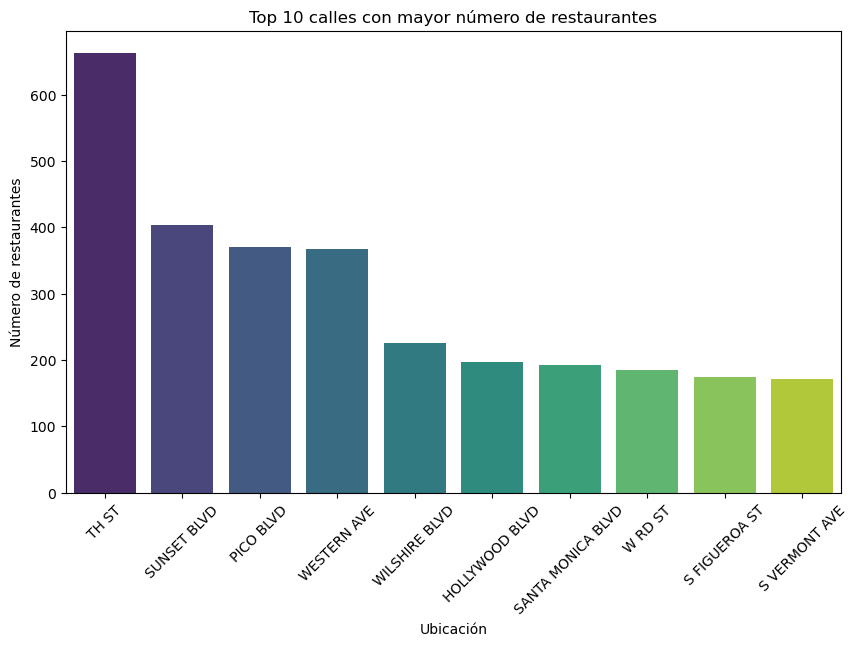

In [49]:
# trazar un gráfico de barras para mostrar las 10 calles con mayor número de restaurantes

plt.figure(figsize=(10, 6))
sns.barplot(x=best_locations.index, y=best_locations.values, palette="viridis")

plt.xticks(rotation=45)

plt.xlabel('Ubicación')
plt.ylabel('Número de restaurantes')
plt.title('Top 10 calles con mayor número de restaurantes')

plt.show()

In [50]:
# calcular el número de calles con solo un restaurante

store_count = data['location'].value_counts()
available_loc = store_count[store_count == 1]
one_store_count = len(available_loc)

print(f'•Número de calles con solo un restaurante: {one_store_count}')

•Número de calles con solo un restaurante: 859


In [51]:
# calcular el numero de asientos de las calles con el mayor número de establecimientos

best_locations = data['location'].value_counts().nlargest(10)
seats_count = data[data['location'].isin(best_locations.index)].groupby('location')['seats'].sum()
seats_count_sorted = seats_count.sort_values(ascending=False)

print(seats_count_sorted)

location
TH ST                27852
SUNSET BLVD          19309
WESTERN AVE          15186
PICO BLVD            15034
WILSHIRE BLVD        12584
HOLLYWOOD BLVD       10933
S FIGUEROA ST         8305
S VERMONT AVE         7793
W RD ST               7736
SANTA MONICA BLVD     6844
Name: seats, dtype: int64


### El número de asientos el las ubicaciones recomendadas

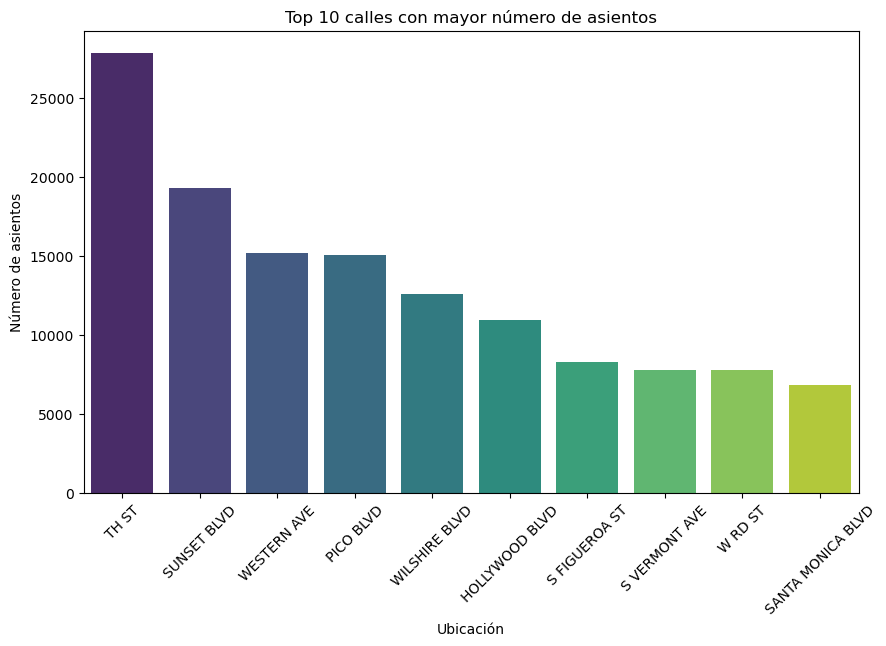

In [52]:
# trazar un gráfico de barras para mostrar el numero de asientos en la calles con el mayor númenro de establecimientos

plt.figure(figsize=(10, 6))
sns.barplot(x=seats_count_sorted.index, y=seats_count_sorted.values, palette="viridis")

plt.xticks(rotation=45)

plt.xlabel('Ubicación')
plt.ylabel('Número de asientos')
plt.title('Top 10 calles con mayor número de asientos')

plt.show()

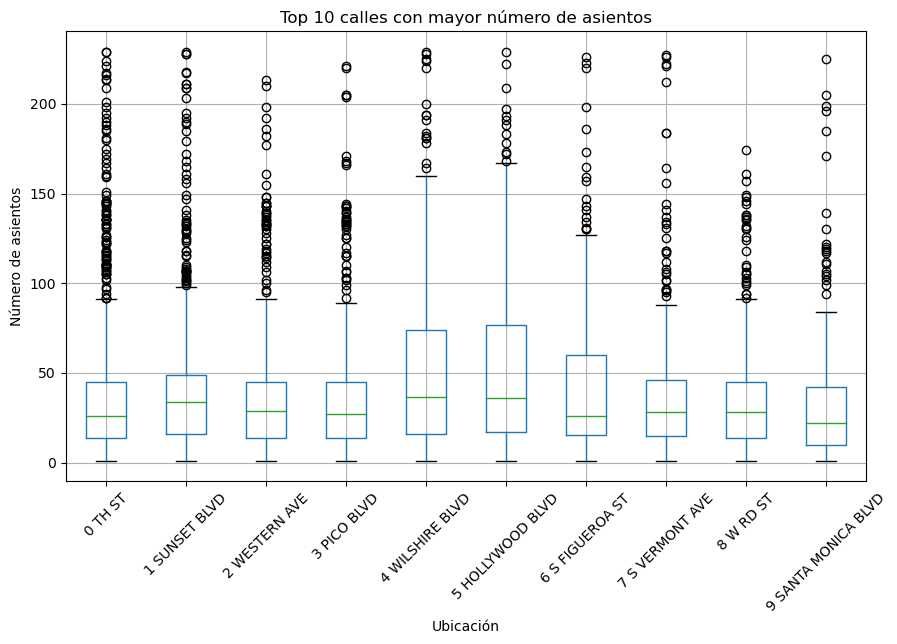

In [53]:
# trazar un diagrama de caja para mostrar la distribución de asientos en las calles con el mayor número de establecimientos

boxplot_data = seats_count_sorted.reset_index()
boxplot_data['sorted'] = boxplot_data.index
boxplot_data['sorted'] = boxplot_data['sorted'].map(str) + ' ' + boxplot_data['location']
boxplot_data = boxplot_data.drop(columns='seats')

data[data['location'].isin(best_locations.index)].merge(boxplot_data).sort_values('sorted').boxplot(column='seats', by='sorted', figsize=(10, 6))

plt.xticks(rotation=45)

plt.xlabel('Ubicación')
plt.ylabel('Número de asientos')
plt.title('Top 10 calles con mayor número de asientos')
plt.suptitle('')

plt.show()

### Evaluacón

- Agregamos una columna con las __direcciones normalizadas__
- Encontramos las __10 calles__ con el mayor número de establecimientos
- La calle con el mayor número de establecimientos es `TH ST` con __663 establecimientos__
- Calculamos el __número de asientos__ de los establecimientos en estas calles
- La calle con el mayor número de asientos es `TH ST` con __27852 asientos__

Presentation: <https://docs.google.com/presentation/d/1X8sarGFMV9HH_dWQFZRb1md4WBDG7UBezrL6GBAeTXM/edit?usp=sharing>